# Decision Tree
 * When Should Decision Trees Be Used?<br>
     * Classification<br>
     * Supervised Learning<br>
     * Discrete Features
        * Time-series can be handled with some feature pre-processing
     * Linear or Non-linear relationships
     * Very fast classification times after training


# Import and Check The Dataset

In [117]:
import pandas as pd
import re
import numpy as np
from sklearn import tree

%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


# How Do Decision Trees Work?
  * Follow a tree-structure to “leaf” nodes which correspond to the final classifications
       * Based on the value of a feature vector<br>
   * Calculate the minimum number of “decisions” to make in order to classify
       * Information Gain
             * The amount of information “gained” by each choice, based on entropy
       * Gini Impurity
             * A measure of mis-classification (ie how many labels are wrong if given random labels)


 ## There are several ways/methods the missing data in decision tree is handled.<br>
   ### Adapt learning algorithm to be robust to the missing values.
 ![title](img/missing_values.png) 
 
 ![title](img/associate_missing_values.png) 
 
  ![title](img/add_missing_value_choice_to_every_decision.png) 
 


# For this project, as the time is limit, I have chosen to take this path:
  1) Search for all empty cells in the data set(130K) and fillna "np.nan" with numpy (NaN)<br>
  2) Search for any existing NaN in the dataset<br>
  3) Counted all the sum of the Nan's and they were about 20% data representation.<br>
  4) Our project goal is to select the top 20 wine varieties as there are more than 600 varieties. 
       * The majority of labels have less than 5 reviews each.
       * So decided to take the TOP 20 frequency wine data set to create this model. <br>
  5) Given the time limit, I've decided to drop all the NaN's in a dataset and lost 20% data.<br>
  6) Even though the data set was for TOP 20, only 16 wine varieties were selected.
  
  
        

In [118]:
# df = pd.read_csv('./InputData/winemag-data-130k-v2.csv')
 
df = pd.read_csv('./InputData/target.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,number_label
0,0,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,3
1,1,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,4
2,2,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,8
3,3,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,3
4,4,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath,3


In [119]:
df.isnull().any()

Unnamed: 0               False
country                  False
description              False
designation              False
points                   False
price                    False
province                 False
region_1                 False
region_2                 False
taster_name              False
taster_twitter_handle    False
title                    False
variety                  False
winery                   False
number_label             False
dtype: bool

# Statistic summary of the dataset

In [120]:
print(df.describe())

         Unnamed: 0        points         price  number_label
count  19025.000000  19025.000000  19025.000000  19025.000000
mean    9512.000000     89.648042     43.032484      7.272641
std     5492.188771      2.835567     30.838047      4.737977
min        0.000000     80.000000      4.000000      0.000000
25%     4756.000000     88.000000     25.000000      3.000000
50%     9512.000000     90.000000     38.000000      5.000000
75%    14268.000000     92.000000     52.000000     11.000000
max    19024.000000    100.000000   2013.000000     19.000000


In [121]:
df.dtypes

Unnamed: 0                int64
country                  object
description              object
designation              object
points                    int64
price                     int64
province                 object
region_1                 object
region_2                 object
taster_name              object
taster_twitter_handle    object
title                    object
variety                  object
winery                   object
number_label              int64
dtype: object

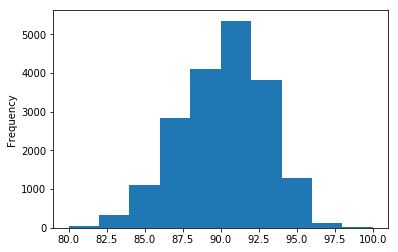

In [122]:
df['points'].plot.hist()
plt.show()

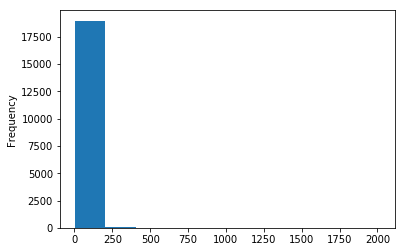

In [123]:
df['price'].plot.hist()
plt.show()

In [124]:
df.drop(df.columns[[0]], axis=1, inplace=True) # drop that unnamed row numbers column
df.describe(include='all')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,number_label
count,19025,19025,19025,19025.000000,19025.000000,19025,19025,19025,19025,19025,19025,19025,19025,19025.000000
unique,1,17408,8325,NaN,NaN,4,169,17,11,11,17350,16,2661,NaN
top,US,"Cigar box, café au lait, and dried tobacco aro...",Reserve,NaN,NaN,California,Columbia Valley (WA),Columbia Valley,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Columbia Crest,NaN
freq,19025,3,655,NaN,NaN,10932,2140,4572,5663,5663,6,4788,134,NaN
mean,NaN,NaN,NaN,89.648042,43.032484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.272641
std,NaN,NaN,NaN,2.835567,30.838047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.737977
min,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,88.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
50%,NaN,NaN,NaN,90.000000,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,92.000000,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000


# creating a function to label all the variety of wine

In [125]:
def add_label(variety):
    num = ""
    if variety=='White Blend':
        num = 0       
    elif variety=='Portuguese Red':
        num = 1 
    elif variety=='Pinot Gris': 
        num = 2
    elif variety=='Pinot Noir':
        num = 3 
    elif variety=='Cabernet Sauvignon': 
        num = 4
    elif variety=='Chardonnay':
        num = 5 
    elif variety=='Malbec': 
        num = 6
    elif variety=='Red Blend':
        num = 7 
    elif variety=='Merlot': 
        num = 8
    elif variety=='Sauvignon Blanc':
        num = 9 
    elif variety=='Sangiovese': 
        num = 10
    elif variety=='Bordeaux-style Red Blend':
        num = 11 
    elif variety=='Rosé': 
        num = 12
    elif variety=='Zinfandel':
        num = 13 
    elif variety=='Syrah': 
        num = 14
    elif variety=='Nebbiolo':
        num = 15 
    elif variety=='Rhône-style Red Blend': 
        num = 16
    elif variety=='Sparkling Blend': 
        num = 17
    elif variety=='Tempranillo':
        num = 18 
    elif variety=='Riesling': 
        num = 19
    return num
 

In [126]:
np.where(df.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [127]:
np.where(pd.isnull(df))

(array([], dtype=int64), array([], dtype=int64))

In [128]:
# df=df.fillna()
# df.head()

In [129]:
# df.replace(to_replace=['^','/','s'], value=np.nan, regex=True, inplace=True)
# df.head()

In [130]:
# Replace all the empty cells in dataframe with numpy NAN
 
# df["points"].replace(r'^\s*$', np.nan, regex=True, inplace = True)
# df["price"].replace(r'^\s*$', np.nan, regex=True, inplace = True)
# df.head()

In [131]:
len(df)

19025

In [132]:
# # drop rows with missing values
df.dropna(how="any", inplace=True) # Remove the rows with missing data
df.count() 

# # summarize the number of rows and columns in the dataset
print(df.shape) 

(19025, 14)


In [133]:
df.isnull().head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,number_label
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Applying the function "add_label" to the created column "number_label"
# This is my target

In [134]:
df["number_label"] = df.variety.apply(add_label)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,number_label
0,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,3
1,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,4
2,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,8
3,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,3
4,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath,3


In [135]:
varieties = df['variety'].value_counts()
varieties.head()

Pinot Noir            4788
Chardonnay            2407
Cabernet Sauvignon    2372
Red Blend             1803
Syrah                 1678
Name: variety, dtype: int64

In [136]:
top_wine_df = df.loc[df['variety'].isin(varieties.axes[0][:20])] # first column[0],  rows :20 
top_wine_df["variety"].describe()

count          19025
unique            16
top       Pinot Noir
freq            4788
Name: variety, dtype: object

In [137]:
top_wine_df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,number_label
0,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,3
1,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,4
2,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,8
3,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,3
4,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath,3


In [138]:
target = top_wine_df["number_label"]
target.head()

0    3
1    4
2    8
3    3
4    3
Name: number_label, dtype: int64

In [139]:
len(target)

19025

# I am assigning all the columns to the data except "number_label" . 
# So dropping that column to assign all columns to data

In [140]:
data = top_wine_df.drop("number_label", axis=1)
feature_names = data.columns
data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
1,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
2,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
3,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
4,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath


In [141]:
# data = top_wine_df[["country","designation","points", "price","province", "variety","region_1","region_2", "winery"]]  
# feature_names = data.columns
# feature_names
# #data.head()
 

In [142]:
data.head()
len(data)

19025

# Check The Relationship Between Columns

   To check the relationships we are going to use seaborn.seaborn provides us with a function called pairplot that plot pairwise relationships in a dataset. We can throw the whole dataframe as the parameters so that it will check relationship for each column to other columns. We can also give categorical color based on a certain column. <br>
   To know whether there are outliers in our data or not we can give hue with Variety(Species) as the parameter.

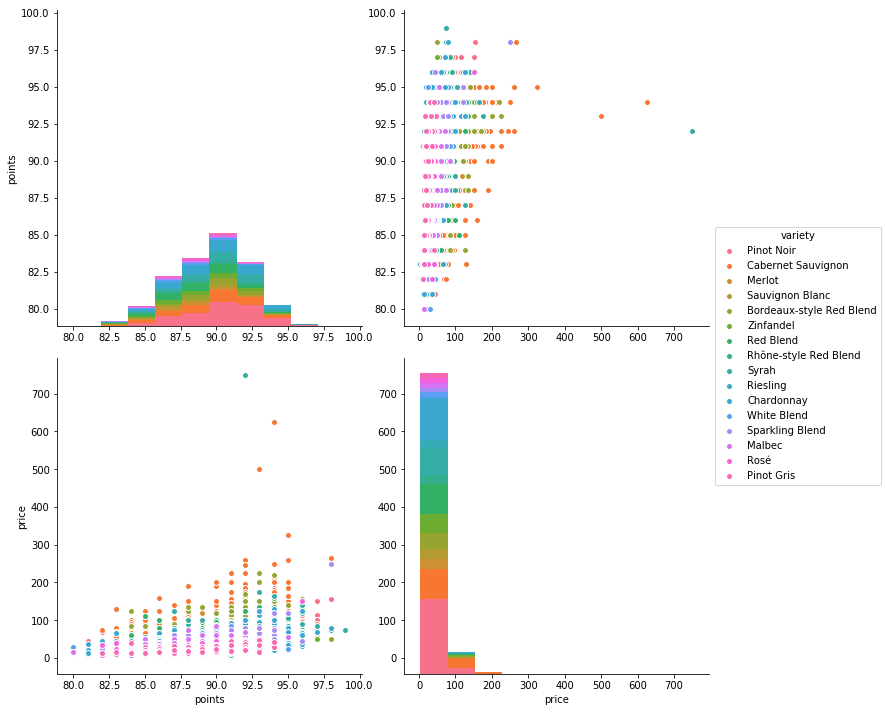

In [143]:
sns.pairplot(data = data[:][0:10000], hue='variety', size=5) # all

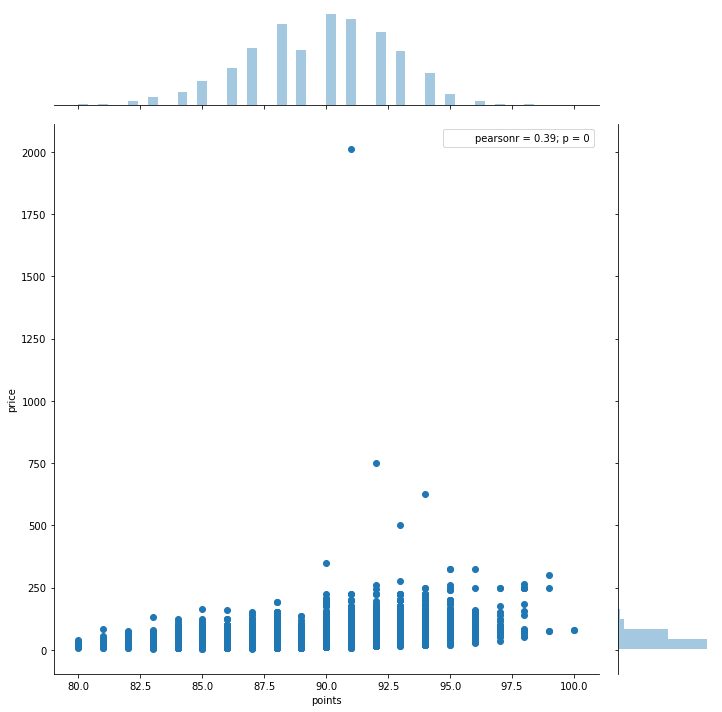

In [144]:
# Draw a plot of two variables with bivariate and univariate graphs.
# This function provides a convenient interface to the JointGrid class, with several canned plot kinds.
sns.jointplot(x='points', y='price', data=data,size = 10)

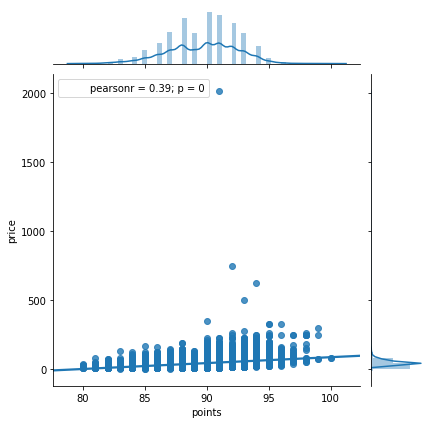

In [145]:
# Add regression and kernel density fits:

sns.jointplot("points", "price", data=data, kind="reg")

# Tranforming the data with LabelEncoder

Creating a custom encoder involves simply creating a class that responds to the fit(), transform(), and fit_transform() methods. In this case, a good start might be something like this:

In [146]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

 

In [147]:
# Create wine data in a Pandas dataframe
data = top_wine_df.drop("number_label", axis=1) 
features = data.columns
target = top_wine_df["number_label"]

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [148]:
MultiColumnLabelEncoder(columns = features).fit_transform(top_wine_df).head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,number_label
0,0,7736,7875,7,60,2,162,16,6,4,14873,6,2255,3
1,0,9607,4686,7,14,0,81,6,10,6,8473,1,1281,4
2,0,15516,6497,7,17,0,92,1,4,3,1802,4,263,8
3,0,7947,3683,7,64,0,130,12,10,6,2901,6,439,3
4,0,2487,3367,6,45,2,67,16,6,4,5504,6,812,3


In [149]:
top_wine_df["number_label"].head()

0    3
1    4
2    8
3    3
4    3
Name: number_label, dtype: int64

In [150]:
MultiColumnLabelEncoder().fit_transform(top_wine_df.drop("number_label", axis=1)).head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,7736,7875,7,60,2,162,16,6,4,14873,6,2255
1,0,9607,4686,7,14,0,81,6,10,6,8473,1,1281
2,0,15516,6497,7,17,0,92,1,4,3,1802,4,263
3,0,7947,3683,7,64,0,130,12,10,6,2901,6,439
4,0,2487,3367,6,45,2,67,16,6,4,5504,6,812


In [151]:
encoding_pipeline = Pipeline([
    ('encoding',MultiColumnLabelEncoder(columns=["country","description","designation","points","price","province","region_1","region_2","taster_name","taster_twitter_handle","title","variety","winery"]))
    # add more pipeline steps as needed
])
encoding_pipeline.fit_transform(top_wine_df)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,number_label
0,0,7736,7875,7,60,2,162,16,6,4,14873,6,2255,3
1,0,9607,4686,7,14,0,81,6,10,6,8473,1,1281,4
2,0,15516,6497,7,17,0,92,1,4,3,1802,4,263,8
3,0,7947,3683,7,64,0,130,12,10,6,2901,6,439,3
4,0,2487,3367,6,45,2,67,16,6,4,5504,6,812,3
5,0,10168,2371,6,93,0,81,6,10,6,11354,1,1688,4
6,0,11467,2984,6,21,0,123,1,4,3,13713,11,2096,9
7,0,309,3459,6,41,3,32,3,8,8,1475,0,215,11
8,0,2744,4990,6,35,0,1,12,10,6,5210,1,770,4
9,0,6650,645,6,69,0,54,6,10,6,7224,1,1109,4


In [152]:
data = MultiColumnLabelEncoder().fit_transform(top_wine_df.drop("number_label", axis=1))



In [153]:
# target = top_wine_df["number_label"].head()
# target_df = target.to_frame().reset_index()
# target_df["number_label"]
# target

In [154]:
# # target = MultiColumnLabelEncoder().fit_transform(top_wine_df.drop(top_wine_df.columns[[0, 12]], axis=1))  
# target = target_pd["number_label"] 

 

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=36)
 

In [156]:
type(target)

pandas.core.series.Series

In [157]:
type(data)

pandas.core.frame.DataFrame

In [158]:
X_train.to_csv("X_train.csv")

In [159]:
top_wine_df.to_csv("target.csv")

In [160]:
#target.to_csv("target.csv")

# DecisionTreeClassifier

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target)

In [162]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [163]:
data = top_wine_df.drop("number_label", axis=1)
feature_names = data.columns
data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
1,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
2,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
3,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
4,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath


In [164]:
target_names = top_wine_df["variety"].unique()
target_names
  

array(['Pinot Noir', 'Cabernet Sauvignon', 'Merlot', 'Sauvignon Blanc',
       'Bordeaux-style Red Blend', 'Zinfandel', 'Red Blend',
       'Rhône-style Red Blend', 'Syrah', 'Riesling', 'Chardonnay',
       'White Blend', 'Sparkling Blend', 'Malbec', 'Rosé', 'Pinot Gris'], dtype=object)

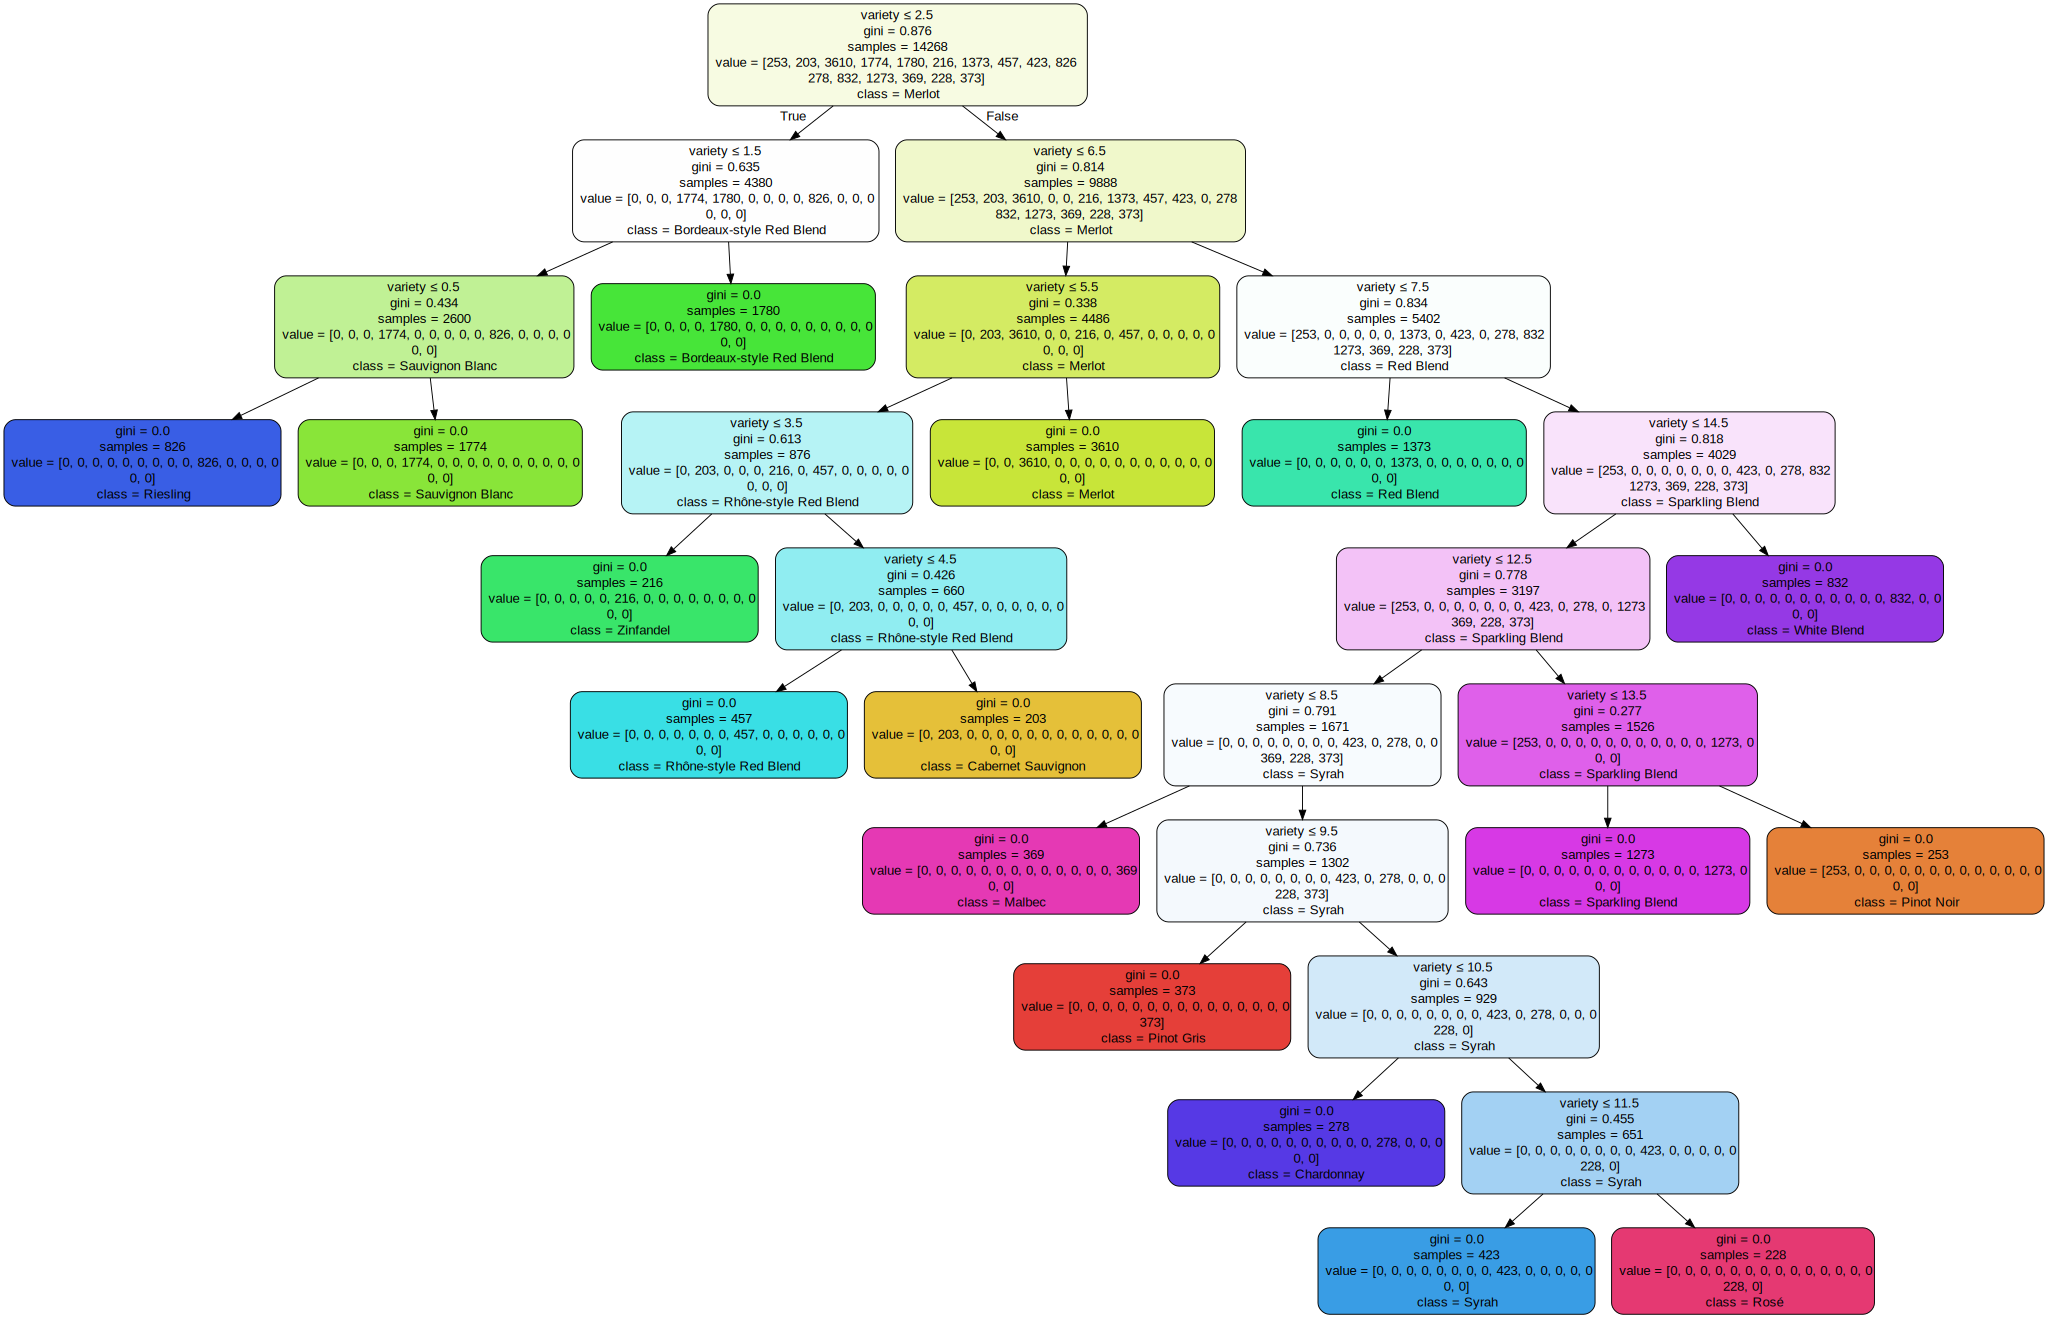

In [165]:
# WARNING! BOILERPLATE CODE HERE! 
# Use this to visualize the tree
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=feature_names,  
    class_names=target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

graph = graphviz.Source(dot_data)  
graph 

# Save the model 

In [181]:
from sklearn.externals import joblib
joblib.dump(clf, 'DecisionTree.pkl')


# Loading the model
clf2 = joblib.load('DecisionTree.pkl') 
 
# Predicting the model and testing
clf2.predict(X_test) 

array([4, 4, 8, ..., 4, 3, 3])

In [182]:
!ls


Database Engineering.ipynb        data.html
DecisionTree-&-RandomForest.ipynb img
DecisionTree.pkl                  methodology.html
InputData                         models
NLP-NaiveBayes.ipynb              spark-warehouse
PowerPoints                       svm.html
README                            target.csv
WineVarietals_SVM-nogrid.ipynb    templates
X_train.csv                       testing
app.py                            wines.sqlite


In [202]:
!ls DecisionTree.pkl

DecisionTree.pkl


In [183]:
clf2

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [184]:
predictions = clf2.predict(X_test)
predictions

array([4, 4, 8, ..., 4, 3, 3])

In [185]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, auc, roc_curve

print('accuracy %s' % accuracy_score(y_test, predictions))


accuracy 1.0


In [186]:
cm = confusion_matrix(y_test, predictions)
print('confusion matrix\n %s' % cm)

confusion matrix
 [[  81    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0   66    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0 1178    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0  598    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0  627    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0   66    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0  430    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0  140    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0  151    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0  286    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0    0   91    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0 

In [187]:
score = accuracy_score(y_test, predictions)
#roc = roc_curve(y_test, predictions)
cr = classification_report(y_test, predictions)

In [188]:
score

1.0

In [189]:
cr 

'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00        81\n          2       1.00      1.00      1.00        66\n          3       1.00      1.00      1.00      1178\n          4       1.00      1.00      1.00       598\n          5       1.00      1.00      1.00       627\n          6       1.00      1.00      1.00        66\n          7       1.00      1.00      1.00       430\n          8       1.00      1.00      1.00       140\n          9       1.00      1.00      1.00       151\n         11       1.00      1.00      1.00       286\n         12       1.00      1.00      1.00        91\n         13       1.00      1.00      1.00       282\n         14       1.00      1.00      1.00       405\n         16       1.00      1.00      1.00       147\n         17       1.00      1.00      1.00        71\n         19       1.00      1.00      1.00       138\n\navg / total       1.00      1.00      1.00      4757\n'

# Test the model

In [194]:
#normalize labels for variety
le = LabelEncoder()
#y = le.fit_transform(wine_df_final["variety"])

In [193]:
print('Test Acc: %.3f' % clf.score(X_test, y_test))

Test Acc: 1.000


In [199]:
test_data = ['cherry, juicy, sweet, oak, berry, meaty, salty, fresh']

# Random Forest 
   ###  What are Random Forests?<br>
   *    A type of Ensemble Learning
   *    Voting classifier
         * Makes a number of trees (from different partitions of the training data) and uses the mode of the tree results for the final result
   *    Vanilla Random Forests are not that exciting


##  RandomForest Boosters

*  Turns weak-learners into strong-learners
*  Weak Learners (prediction “barely” better than chance)
*  Strong Learners (prediction higher than some arbitrary value), generally what we think of when considering classification
*  Assigns weights to a number of weak-learners in order to get a strong-learner
*  Multiple different variations of boosting
*  Gradient Boosting
*  AdaBoost
*  Others


In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.98066007988227877

In [59]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.5844529364531158, 'variety'),
 (0.071859251148571224, 'price'),
 (0.053738520942543173, 'region_2'),
 (0.050206689906950527, 'region_1'),
 (0.04374577429306914, 'designation'),
 (0.039941723699752026, 'title'),
 (0.036766752405085847, 'description'),
 (0.03590214039324037, 'winery'),
 (0.028470989385662716, 'points'),
 (0.027259797761573765, 'province'),
 (0.013860858998465781, 'taster_twitter_handle'),
 (0.013794564611969783, 'taster_name'),
 (0.0, 'country')]